# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = query_url + city
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
    # Add 1 to the record count
    record_count += 1
   
    # Run an API request for each of the cities
    try:
                # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsiombe
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | djamaa
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | rantauprapat
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | santana
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | lisala
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | anna regina
Processing Record 17 of Set 1 | nefteyugansk
Processing Record 18 of Set 1 | luena
Processing Record 19 of Set 1 | ikovka
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | papao
Processing Record 22 of Set 1 | portland
Processing Record 23 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,23.49,96,2,1.14,MG,1707426246
1,waitangi,-43.9535,-176.5597,16.57,66,46,12.46,NZ,1707426248
2,constantia,44.1833,28.6500,6.38,66,75,4.60,RO,1707426249
3,djamaa,33.5339,5.9931,16.73,26,0,5.46,DZ,1707426250
4,bilibino,68.0546,166.4372,-33.55,100,99,0.06,RU,1707426250


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,23.49,96,2,1.14,MG,1707426246
1,waitangi,-43.9535,-176.5597,16.57,66,46,12.46,NZ,1707426248
2,constantia,44.1833,28.6500,6.38,66,75,4.60,RO,1707426249
3,djamaa,33.5339,5.9931,16.73,26,0,5.46,DZ,1707426250
4,bilibino,68.0546,166.4372,-33.55,100,99,0.06,RU,1707426250


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

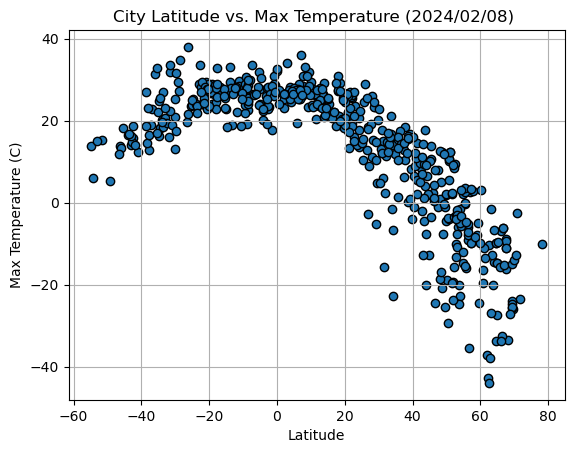

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor="black", marker ="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

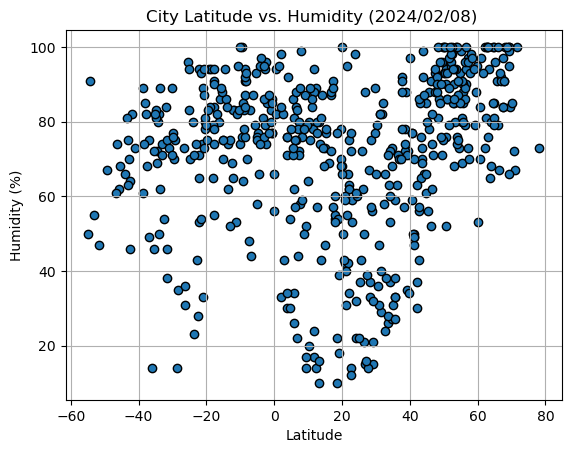

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolor="black", marker ="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

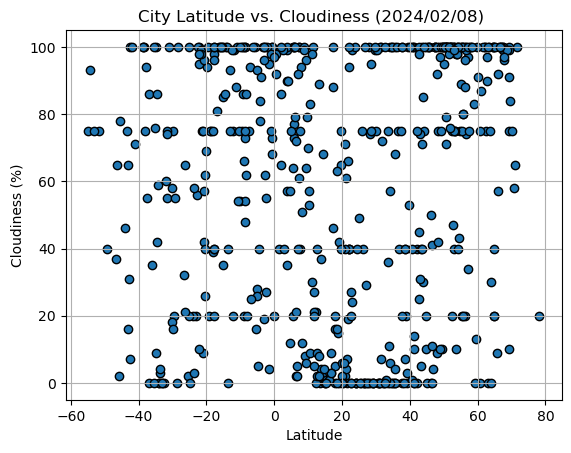

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolor="black", marker ="o",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

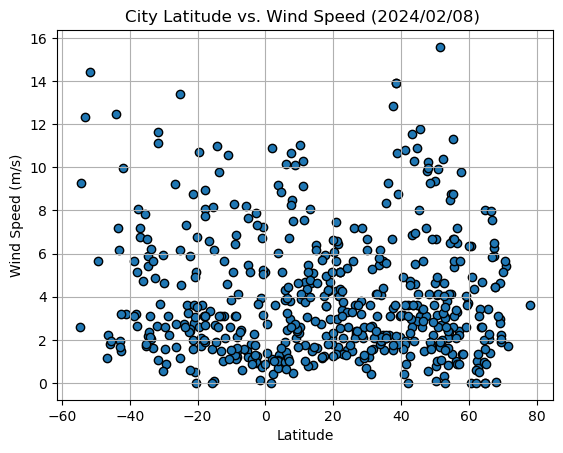

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolor="black", marker ="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, eq_loc):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, eq_loc, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,constantia,44.1833,28.6500,6.38,66,75,4.60,RO,1707426249
3,djamaa,33.5339,5.9931,16.73,26,0,5.46,DZ,1707426250
4,bilibino,68.0546,166.4372,-33.55,100,99,0.06,RU,1707426250
5,rantauprapat,2.1000,99.8333,23.13,98,86,1.09,ID,1707426250
6,hawaiian paradise park,19.5933,-154.9731,25.49,78,75,2.06,US,1707426251


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,23.49,96,2,1.14,MG,1707426246
1,waitangi,-43.9535,-176.5597,16.57,66,46,12.46,NZ,1707426248
8,bredasdorp,-34.5322,20.0403,18.30,72,42,2.17,ZA,1707426251
10,santana,-0.0583,-51.1817,32.10,66,20,5.14,BR,1707426251
14,puerto natales,-51.7236,-72.4875,15.25,47,75,14.40,CL,1707426252


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7527363527917718


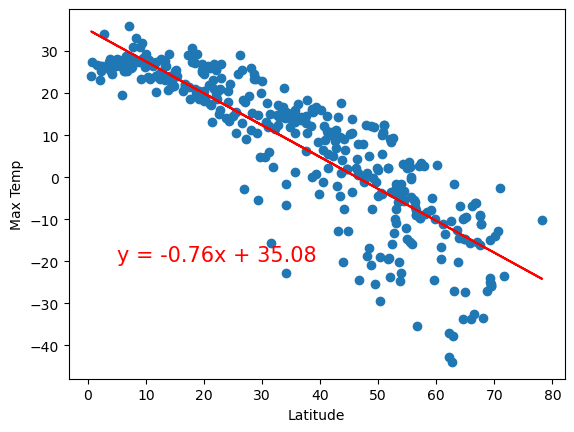

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"
eq_loc = (5,-20)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.3459946268680068


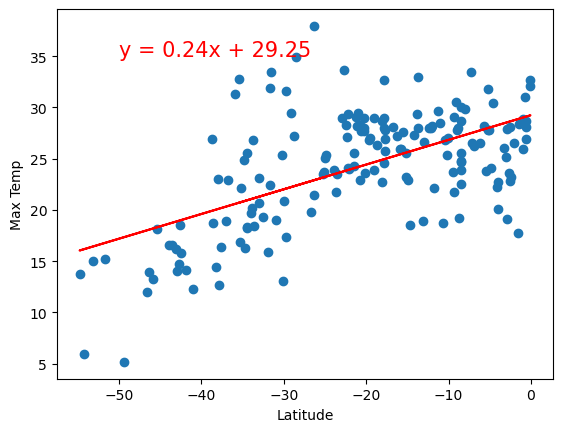

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"
eq_loc = (-50,35)
plot_linear_regression(x_values, y_values, y_label, eq_loc) 
plt.show()

**Discussion about the linear relationship:** The .41 r-value sugguests a moderate positive linear relationship between latitude and max temp for the southern hemisphere. The .71 r-value for the northern hemisphere has a stronger relationship between the latitude and max temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18753772876257735


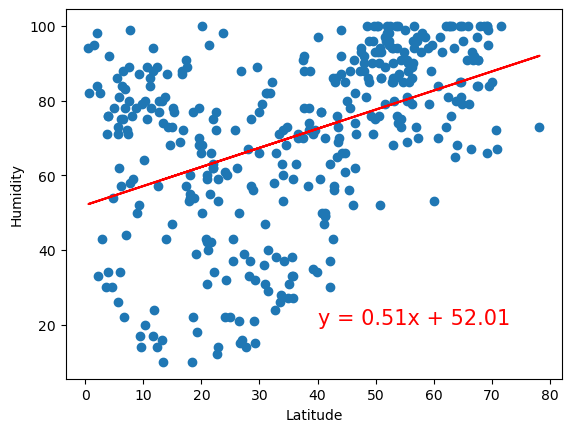

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
eq_loc = (40,20)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.10357983320373072


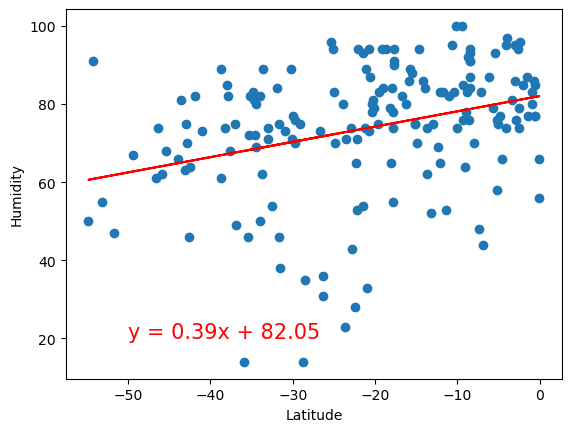

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
eq_loc = (-50,20)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

**Discussion about the linear relationship:** The r-value is .04 for southern hemisphere and for the northern hemisphere is .13. The relationship between latitude and humidity is still very week, but it is slightly better in the northern hemispher.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08799442445020715


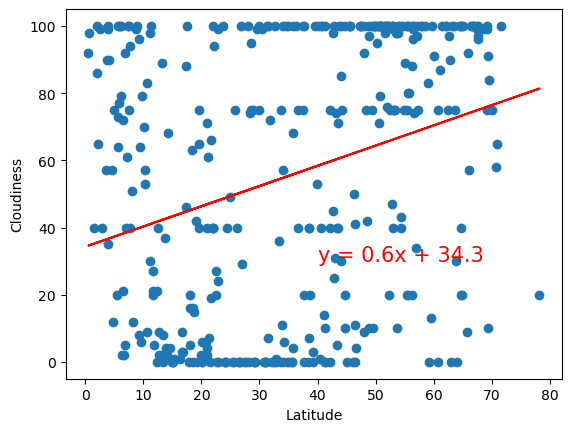

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
eq_loc = (40,30)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.03607992162046496


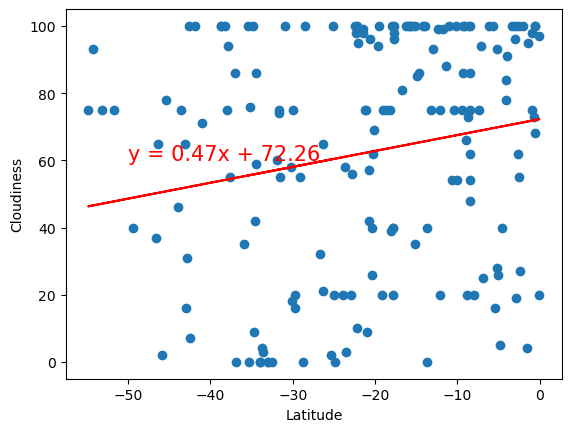

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
eq_loc = (-50,60)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

**Discussion about the linear relationship:** The r-value for the north hemispher is .05 and for the south hemispher is .05, this suggests that relationship between latitude and cloudiness is very week for both hemispher. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.6931135347056143e-06


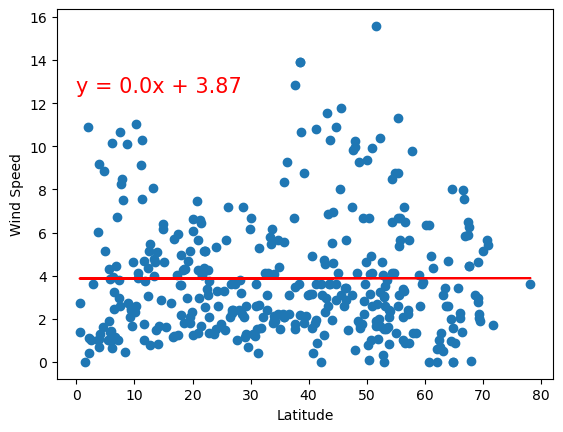

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
eq_loc = (0,12.5)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.04980829809900397


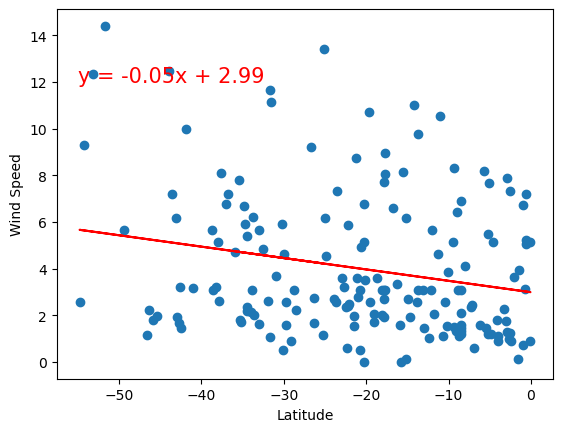

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
eq_loc = (-55,12)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

**Discussion about the linear relationship:** The r-value for the southern hemispher is .02 and the r-value for the northern hemispher is .00, which suggests a weak relationship between wind speed and latitude. 